# Simple Linear Regression

Regression is a statistical method using a single dependent variable and one or more independent variable(s). 

The dependent variable is continuous. The independent, predictor variable can be either continuous or categorical. 

It assumes that the relation between X and Y is approximately linear. Thus, the change in the Y is proportional to the change in X. 

The aim is to find the best-fitting straight line through the training examples. This line should minimise the absolute distance between the line and the observations. This is the regression line. The vertical lines from the regression line to the original data points are offsets.

## A. Import libraries and create data

We will import all libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

We will create a DataFrame with blood pressure and BMI as features.

In [2]:
data = {'Blood Pressure (mmHg)': [120, 128, 132, 138, 140, 142, 144, 148, 152, 156],
        'BMI (kg/m^2)': [22.5, 27.3, 26.8, 29.1, 30.0, 31.5, 32.0, 33.2, 35.5, 36.0]}

df = pd.DataFrame(data)
print(df)

   Blood Pressure (mmHg)  BMI (kg/m^2)
0                    120          22.5
1                    128          27.3
2                    132          26.8
3                    138          29.1
4                    140          30.0
5                    142          31.5
6                    144          32.0
7                    148          33.2
8                    152          35.5
9                    156          36.0


We will define BMI as independent variale and Blood Pressure as dependent variable.

In [3]:
X = pd.DataFrame(data['BMI (kg/m^2)'])
Y = pd.DataFrame(data['Blood Pressure (mmHg)'])

In [4]:
X

,0
0,22.5
1,27.3
2,26.8
3,29.1
4,30.0
5,31.5
6,32.0
7,33.2
8,35.5
9,36.0


In [5]:
Y

,0
0,120
1,128
2,132
3,138
4,140
5,142
6,144
7,148
8,152
9,156


We will create a scatterplot of the data to visualise the relationship between the variables.

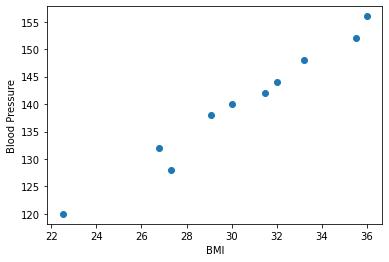

In [6]:
plt.scatter(X, Y)
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.show()

There is approximately a linear relationship between blood pressure and BMI. 

## B. Linear Regression using Skicit-Learn

We will need to find the best-fit line to predict the dependent variable's value. To determine the intercept and the slope, we will create a Linear Regression object and fit the data. We will use sklearn.linear_model.LinearRegression:

In [7]:
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression()

Then we can print the intercept and the slope of the regression line. 

In [8]:
print('Intercept: ', reg.intercept_)
print('Slope: ', reg.coef_)

Intercept:  [60.34300971]
Slope:  [[2.62115796]]


The value for the intercept is 60.34300971, while the value for the slope is 2.62115796. We can interpret the line of best fit as follows. When BMI is 0, the average value for blood pressure is 60.34300971. For every increase in BMI, the blood pressures increase by 2.62. 

We will use the regression line to make predictions.

In [9]:
y_pred = reg.predict(X)

In [10]:
y_pred

array([[119.31906373],
       [131.90062192],
       [130.59004294],
       [136.61870624],
       [138.9777484 ],
       [142.90948533],
       [144.22006431],
       [147.36545386],
       [153.39411716],
       [154.70469613]])

## C. Linear Regression using statsmodel

In [11]:
import statsmodels.api as sm

We will add a constant to the predictor variable.

In [12]:
X = sm.add_constant(X)

We will fit a linear regression model.

In [13]:
model = sm.OLS(Y, X).fit()

We will view the model summary.

In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     335.6
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           8.11e-08
Time:                        08:47:21   Log-Likelihood:                -18.874
No. Observations:                  10   AIC:                             41.75
Df Residuals:                       8   BIC:                             42.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.3430      4.385     13.762      0.0

/Users/steffipoliwoda/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


- Adj. R-squared reflects the fit of the model. R-squared values range from 0 to 1. A high value generally indicates a better fit. In our example, the value is 0.974.  
- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
- P >|t| is the p-value. A p-value of less than 0.05 is considered to be statistically significant. In our example, the p-value is 0.00. 

In [15]:
import matplotlib.pyplot as plt
import numpy as np

We will add the line of best to the plot.

Text(0, 0.5, 'Blood Pressure (mmHg)')

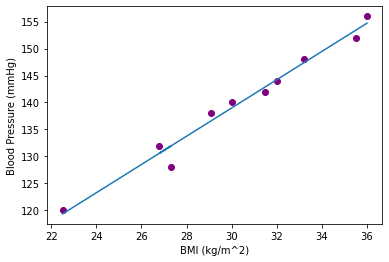

In [16]:
a, b = np.polyfit(df['BMI (kg/m^2)'], df['Blood Pressure (mmHg)'], 1)
plt.scatter(df['BMI (kg/m^2)'], df['Blood Pressure (mmHg)'], color='purple')
plt.plot(df['BMI (kg/m^2)'], a*df['BMI (kg/m^2)']+b)

plt.xlabel('BMI (kg/m^2)')
plt.ylabel('Blood Pressure (mmHg)')